**Taller Algoritmos Genéticos**

Para este taller resuelva los siguentes puntos:

1. Diseñar un AG, para encontrar la solución del siguiente problema:


El objetivo es optimizar el proceso recolección de desechos del campus de una Universidad, la cual cuenta con ${N}$ edificios que están localizados a los lados de una vía circular. En dicha universidad se generan dos tipos de desechos:

* Los que implican riesgo biológico

* No constituyen ningún riesgo.

La empresa de recolección de desechos necesita determinar el número de camiones a asignar y los horarios correspondientes para llevar a cabo la recolección en la Universidad.

*Minimizar el número de camiones y visitas de recolección que se hacen a la Universidad*


***Restricciones***:

* Los vehículos solo pueden transitar en una dirección por dicha vía circular.

* Un camión solo puede recolectar desechos de un tipo y se pueden asignar para recolectar desechos siete días a la semana.

* Los desechos en un recorrido no deben sobrepasar la capacidad de los camiones.

* Dos camiones con diferente función no pueden estar haciendo el mismo recorrido.

* Los edificios alistan sus desechos para recolección, y no todos lo hacen los mismos días de la semana.

* Los desperdicios biológicos deben ser recolectados en horarios no laborales.

* Los desperdicios no biológicos se pueden recolectar en cualquier horario. La franja de recolección es de 5 am a 8 pm, sin importar si se trata de un fin de semana.

* La capacidad de los camiones son:

      * Camión 1 320 kilos

      * Camión 2 250kilos

      * Camión 3 200 kilos.

* El costo de operación por los camiones están dados por:

      * Camión 1 7900

      * Camión 2 6300

      * Camión 3 480




* Hacer una descripción de la solución encontrada:
    * Función objetivo
    * Operadores geneticos
    * Estrategias de selección


* Realizar la implementación y concluir sobre la solución del problema. ¿Qué otros objetivos se pueden alcanzar con la información que se tiene del problema?

Pasoso para la solución del problema:

1. Representar el dominio de la variable del problema como un cromosoma de longitud fija, elegir el tamaño de una población de cromosomas $N$, la probabilidad de cruce $P_{c}$ y la probabilidad de mutación $P_{m}$.

2. Definir una función de aptitud para medir el rendimiento, de un cromosoma individual en el dominio del problema. La función de aptitud establece la base para la selección de los cromosomas que serán apareados durante la reproducción.

3. Generar aleatoriamente una población inicial de cromosomas de tamaño $N$:  $X_{1},X_{2},...,X{n}$

4. Calcular la aptitud de cada cromosoma individual: $f(x_{1})$,$f(x_{2})$ $,... f(x_{n})$

5. Seleccionar un par de cromosomas para el apareamiento de la población actual. Los cromosomas padres se seleccionan con una probabilidad relacionada con su aptitud.

6. Crear un par de cromosomas descendientes aplicando los operadores genéticos: cruce y mutación.

7. Colocar los cromosomas creados en la nueva población.

8. Repita el paso $5$ hasta que el tamaño de la nueva población de cromosomas sea igual al tamaño de la población inicial, $N$.

9. Sustituir la población inicial de cromosomas (padres) por la nueva población (hijos)

10. Ir al paso 4, y repita el proceso hasta que se cumpla el criterio de terminación.




***Ejemplo que puede servir para la solución del problema:***

Supongamos que se desea encontrar el máximo de la función de dos variables

 $f(x,y)=(1-x)^{2}e^{-x^{2}-(y+1)^{2}}-(x-x^{3}-y^{3})e^{x^{2}-y^{2}}$

Donde los parámetros $x$ e $y$ varían entre -3 y 3

1. El primer paso es representar las variables del problema como un cromosoma: los parámetros $x$ e $$ como una cadena binaria concatenada:

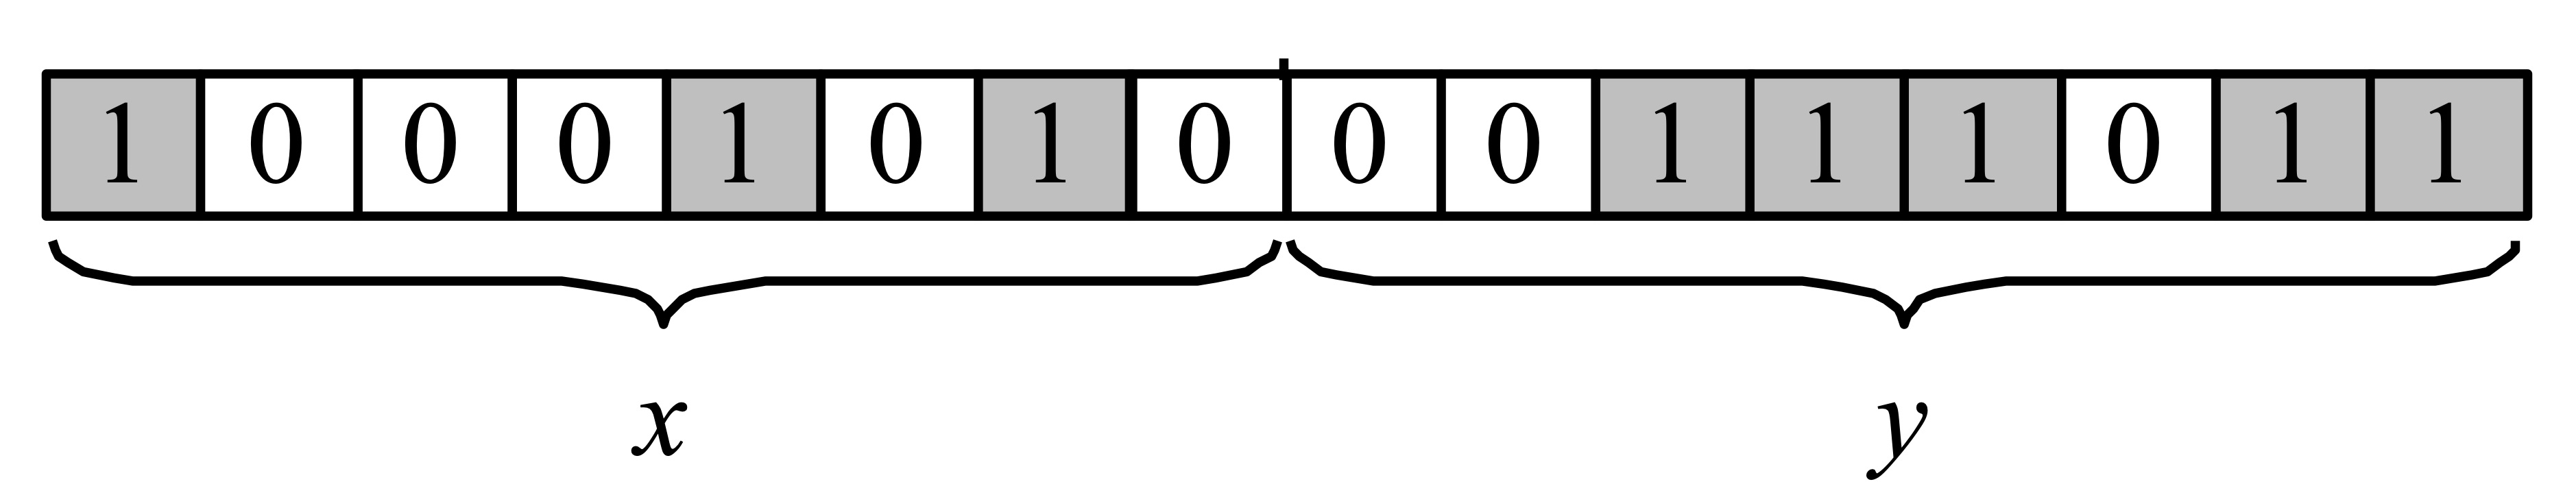


2. También  se elegie el tamaño de la población de cromosomas, por ejemplo 6, y generamos aleatoriamente una población inicial

3. El siguiente paso es calcular la aptitud de cada cromosoma. Esto se hace en dos etapas:

  En primer lugar, un cromosoma, que es una cadena de 16 bits, se divide en dos cadenas de 8 bits:
  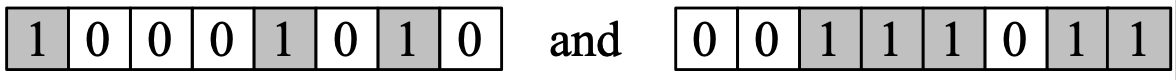

  A continuación, estas cadenas se convierten de binario (base 2) a decimal (base 10):
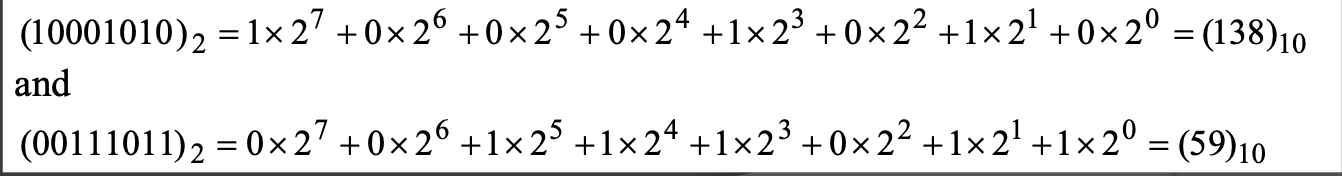

4. Ahora el rango de enteros que puede ser manejado por 8-bits, es decir el rango de $0$ a $(2^{8} - 1)$, es mapeado al rango real de los parámetros $x$ e $y$, es decir el rango de -3 a 3:  $\frac{6}{256-1}=0.0235294$

5. Para obtener los valores reales de $x$ e $y$, multiplicamos sus valores decimales por $0,0235294$ y restamos 3 al resultado.

  $x=(138)_{10} \times 0.0235294-3=0.2470588$
  $y=(59)_{10} \times 0.0235294-3= -1.61176347 $

6. Utilizando los valores decodificados de x e y como entradas en la función matemática, el AG calcula la aptitud de cada cromosoma.

7. Para encontrar el máximo de la función, se utiliza el cruce con la probabilidad igual a $0,7$ y la mutación con la probabilidad igual a $0,001$. Como se ha mencionado anteriormente, una práctica común en los AG es especificar el número de generaciones. Supongamos que el número de generaciones deseado es $100$. Es decir, el AG creará 100 generaciones de 6 cromosomas antes de detenerse.

 $f(x,y)=(1-x)^{2}e^{-x^{2}-(y+1)^{2}}-(x-x^{3}-y^{3})e^{x^{2}-y^{2}}$

In [76]:
import random
import math
def cromosoma(tam):
  vec=[]
  for i in range(tam):
    vec.append(random.randint(0,1))
  return vec

def bin_dec(val_bin):
  valor=0
  for i in range(len(val_bin)):
    valor+=val_bin[i]*2**(len(val_bin)-i-1)

  valor = valor*(2/255)-1
  return valor

def adaptabilidad(x,y):
  f=(1-x)**2*math.exp(-x**2-(y+1)**2)-(x-x**3-y**3)*math.exp(x**2-y**2)
  return f

def mejores(ind_adapt):
  ind_adapt=list(ind_adapt)
  ind_adapt.sort(reverse=True)
  return ind_adapt[:2]
  #individuos.

def cruce(padres, prob=0.7):
  #hijo1=[]
  #hijo2=[]
  padre1=padres[0][1][0]
  padre1=padre1+padres[0][1][1]
  padre2=padres[1][1][0]
  padre2=padre2+padres[1][1][1]
  #print('p1',padre1)
  #print('p2',padre2)

  if random.random()<prob:
    pos=random.randint(1,len(padre1)-1)
    hijo=padre1[:pos]+padre2[pos:]
  else:
    pos=random.randint(1,len(padre1)-1)
    hijo=padre2[:pos]+padre1[pos:]
  #cruce forma1
  #if random.random()<prob:
  #  hij_x=padres[0][1][0]
  #  hij_y=padres[1][1][1]
    #hijo1.append(hijx)
  #else:
  #  hij_x=padres[1][1][0]
  #  hij_y=padres[0][1][1]
  hij_x=hijo[:8]
  hij_y=hijo[8:]
  val=[hij_x,hij_y]
  return val

def mutacion(individuos, prob_mut=0.1):
  for ind in individuos:
    if random.random()<prob_mut:
      mut=random.randint(0,1)
      pos=random.randint(0,len(ind[0])-1)
      ind[mut][pos]=1 if ind[mut][pos]==0 else 0
  return individuos

individuos=[]
for i in range(100):
  ind = cromosoma(16)
  indx = ind[:8]
  indy = ind[8:]
  individuos.append([indx,indy])
#individuos
print(individuos)
for i in range(100):
  adapt=[]
  for indx,indy in individuos:
    valx = bin_dec(indx)
    valy = bin_dec(indy)
    adapt.append(adaptabilidad(valx,valy))
  #print(adapt)
  ind_mejores = mejores(zip(adapt,individuos))
  #print(ind_mejores)

  #nueva generación
  individuos=[]
  for i in range(6):
    individuos.append(cruce(ind_mejores,prob=0.7))
  individuos = mutacion(individuos, prob_mut=0.1)
  #print('adaptabilidad=',adapt)
#list(zip(adapt,individuos))
x=bin_dec(ind_mejores[1][1][0])
y=bin_dec(ind_mejores[1][1][1])
print(x,y)
print(adaptabilidad(x,y))
#print(mejores(zip(adapt,individuos))[0])

[[[0, 1, 0, 1, 1, 0, 1, 0], [1, 0, 0, 0, 0, 1, 0, 0]], [[0, 0, 1, 1, 1, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0]], [[1, 1, 1, 0, 0, 0, 1, 1], [1, 0, 1, 1, 0, 1, 0, 1]], [[0, 0, 0, 1, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 1]], [[0, 0, 0, 0, 1, 0, 1, 0], [0, 1, 1, 1, 0, 0, 0, 0]], [[0, 0, 0, 0, 1, 1, 1, 0], [1, 1, 1, 0, 1, 0, 0, 1]], [[0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 0, 1, 0]], [[1, 1, 1, 0, 1, 0, 0, 0], [1, 1, 0, 1, 1, 0, 1, 1]], [[0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 1, 1, 1, 0, 0, 0]], [[0, 1, 1, 0, 0, 0, 0, 0], [1, 1, 0, 1, 0, 1, 0, 0]], [[0, 0, 0, 1, 0, 0, 1, 1], [1, 1, 0, 1, 1, 1, 0, 1]], [[0, 1, 0, 0, 0, 0, 1, 1], [1, 1, 0, 1, 0, 0, 0, 0]], [[0, 0, 0, 0, 0, 1, 0, 1], [1, 1, 0, 0, 1, 1, 1, 1]], [[1, 0, 0, 1, 0, 0, 0, 1], [0, 1, 1, 0, 0, 1, 0, 1]], [[1, 0, 1, 0, 1, 0, 0, 1], [1, 1, 1, 1, 0, 1, 0, 0]], [[0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 1, 0]], [[1, 0, 1, 1, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 1, 1]], [[0, 1, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 0, 0, 0, 0]], [[1, 1, 0, 1, 1, 0, 1, 0], 

In [32]:
ind_mejores[1][1]#[0]

[[0, 0, 1, 1, 1, 1, 0, 0], [1, 0, 0, 0, 1, 1, 0, 1]]

In [ ]:

#Funciones
#El cromosoma tiene 24 posiciones
from random import randint
def cromo():
  vec=[]
  for i in range(0,23):
    vec.append(randint(0,1))
  return vec

def fitN(x):
  crox=[]
  croy=[]
  croz=[]
  for i in range(0,7):
    crox.append(x[i])
  for i in range(8,15):
    croy.append(x[i])

  for i in range(16,23):
    croz.append(x[i])
  return crox, croy, croz

  #Funcion de evaluacion

fitN(cromo())



([1, 1, 1, 1, 1, 1, 0], [0, 1, 1, 1, 1, 0, 0], [1, 0, 1, 1, 1, 1, 1])

2. Para el problema de la mochila

*En el problema de la mochila, una mochila tiene un peso máximo específico que puede contener. En la mochila caben varios objetos, y cada uno de ellos tiene un peso y un valor diferentes. El objetivo es meter en la mochila tantos artículos como sea posible para que el valor total sea máximo y el peso total no supere el límite de la mochila*

Como ejemplo trivial, dada la especificación del problema en la tabla, una mochila puede tener una capacidad de peso total de 9 kg, y podría contener cualquiera de los ocho artículos de peso y valor variable.


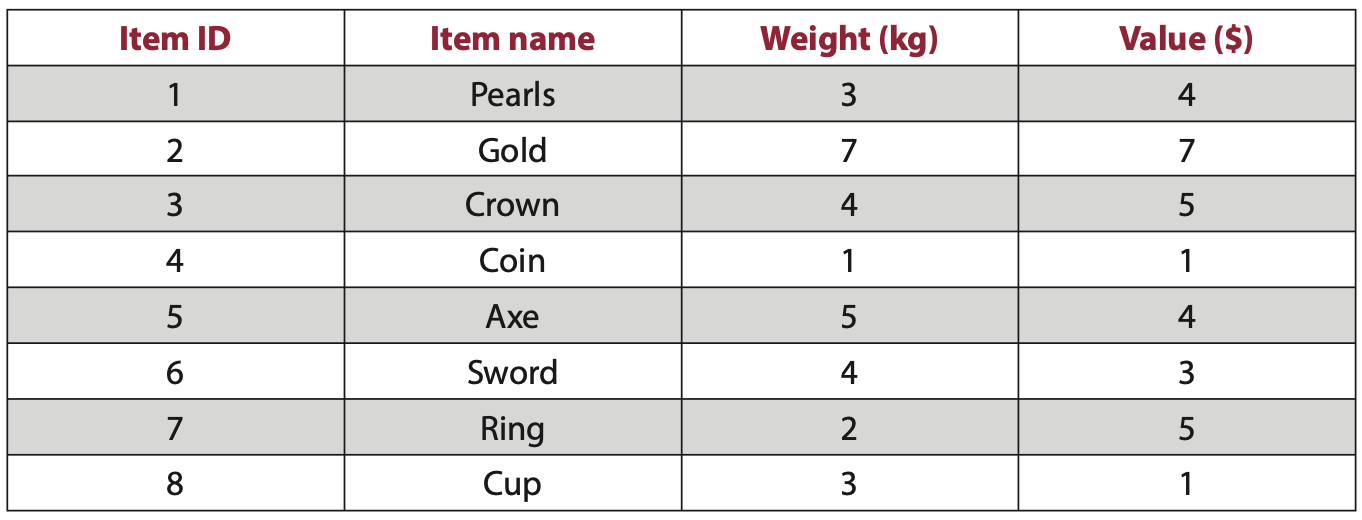

Encuentre la solución utilizando los siguientes algoritmos:

* Ascenso de colinas
* Temple Simulado
* Algoritmo Genetico
* PSO

Haga una comparación de las soluciones obtenidas. ¿Cuál algoritmo tiene mejor desempeño?




Compare el desempeño de su algoritmo genetico vs un algorimto de fuerza bruta para encontrar la solución al problema de mochila.

A continuación el algorimto de fuerza bruta:


In [78]:
import itertools
from itertools import product
import time


# 0 = name, 1 = weight, 2 = value, 3 = fitness
KNAPSACK_WEIGHT_INDEX = 1
KNAPSACK_VALUE_INDEX = 2
KNAPSACK_FITNESS_INDEX = 3

# Small knapsack dataset
knapsack_items = [
    ['Pearls', 3, 4],
    ['Gold', 7, 7],
    ['Crown', 4, 5],
    ['Coin', 1, 1],
    ['Axe', 5, 4],
    ['Sword', 4, 3],
    ['Ring', 2, 5],
    ['Cup', 3, 1],
]


# Obtener todas las combinaciones posibles de elementos. Esto es exhaustivo y computacionalmente caro.
def get_all_combinations(items):
    combinations = []
    for index in range(0, len(items)):
        combinations.append(items[index])
        possibilities = [list(x) for x in itertools.combinations(items, index)]
        combinations.append(possibilities)
    return combinations


# Calcular la aptitud de los elementos seleccionados dado un peso máximo
def calculate_individual_fitness(solution, maximum_weight):
    total_weight = 0
    total_value = 0
    # Obtenga los valores y el peso de cada elemento marcado con un 1
    for item_index in range(0, len(solution)):
        item = solution[item_index]
        if item == 1:
            total_weight += knapsack_items[item_index][KNAPSACK_WEIGHT_INDEX]
            total_value += knapsack_items[item_index][KNAPSACK_VALUE_INDEX]
    # Aptitud cero si se viola la restricción de peso
    if total_weight > maximum_weight:
        return 0
    return total_value


# Ejecutar el algoritmo de fuerza bruta
def run_brute_force():
    bit_string_size = 8
    best_score = 0
    best_individual = []
    knapsack_max_capacity = 9
    print('Número de combinaciones: ', 2**bit_string_size)
    iteration = 0
    for i in product([0, 1], repeat=bit_string_size):
        current = calculate_individual_fitness(i, knapsack_max_capacity)
        if current > best_score:
            best_score = current
            best_individual = i
            print('Iteración: ', iteration)
            print('Mejor puntuación: ', best_score)
            print('El mejor individuo: ', best_individual)
        iteration += 1

    print(best_individual)


# Ejecutar el método de fuerza bruta y medir su rendimiento
start_time = time.time()
run_brute_force()
end_time = time.time()
total_time = end_time - start_time
print('Tiempo total', total_time)

Número de combinaciones:  256
Iteración:  1
Mejor puntuación:  1
El mejor individuo:  (0, 0, 0, 0, 0, 0, 0, 1)
Iteración:  2
Mejor puntuación:  5
El mejor individuo:  (0, 0, 0, 0, 0, 0, 1, 0)
Iteración:  3
Mejor puntuación:  6
El mejor individuo:  (0, 0, 0, 0, 0, 0, 1, 1)
Iteración:  6
Mejor puntuación:  8
El mejor individuo:  (0, 0, 0, 0, 0, 1, 1, 0)
Iteración:  7
Mejor puntuación:  9
El mejor individuo:  (0, 0, 0, 0, 0, 1, 1, 1)
Iteración:  26
Mejor puntuación:  10
El mejor individuo:  (0, 0, 0, 1, 1, 0, 1, 0)
Iteración:  35
Mejor puntuación:  11
El mejor individuo:  (0, 0, 1, 0, 0, 0, 1, 1)
Iteración:  66
Mejor puntuación:  12
El mejor individuo:  (0, 1, 0, 0, 0, 0, 1, 0)
Iteración:  162
Mejor puntuación:  14
El mejor individuo:  (1, 0, 1, 0, 0, 0, 1, 0)
(1, 0, 1, 0, 0, 0, 1, 0)
Tiempo total 0.019669055938720703


In [151]:
KNAPSACK_WEIGHT_INDEX = 1
KNAPSACK_VALUE_INDEX = 2
KNAPSACK_FITNESS_INDEX = 3
peso_maximo=9
# Small knapsack dataset
knapsack_items = [
    ['Pearls', 3, 4],
    ['Gold', 7, 7],
    ['Crown', 4, 5],
    ['Coin', 1, 1],
    ['Axe', 5, 4],
    ['Sword', 4, 3],
    ['Ring', 2, 5],
    ['Cup', 3, 1],
]

# Calcular la aptitud de los elementos seleccionados dado un peso máximo
def adaptabilidad(solution, maximum_weight):
    #print(solution)
    total_weight = 0
    total_value = 0
    # Obtenga los valores y el peso de cada elemento marcado con un 1
    for item_index in range(0, len(solution)):
        item = solution[item_index]
        if item == 1:
            total_weight += knapsack_items[item_index][KNAPSACK_WEIGHT_INDEX]
            total_value += knapsack_items[item_index][KNAPSACK_VALUE_INDEX]
    # Aptitud cero si se viola la restricción de peso
    #print(total_weight)
    if total_weight > maximum_weight:
        return 0
    return total_value

def cromosomas(poblacion, genes):
  individuos=[]
  for i in range(poblacion):
    ind=[]
    for j in range(genes):
      ind.append(random.randint(0,1))
    individuos.append(ind)
  return individuos

def mejores(individuos,peso_maximo):
  adapt=[]
  for i in individuos:
    adapt.append(adaptabilidad(i,peso_maximo))
  ind_adapt=list(zip(adapt,individuos))
  ind_adapt.sort(reverse=True)
  return ind_adapt[:2]

def cruce(padres, prob=0.7):
  padre1=padres[0][1]
  padre2=padres[1][1]

  if random.random()<prob:
    pos=random.randint(1,len(padre1)-1)
    hijo1=padre1[:pos]+padre2[pos:]
    hijo2=padre2[:pos]+padre1[pos:]
  else:
    pos=random.randint(1,len(padre1)-1)
    hijo1=padre2[:pos]+padre1[pos:]
    hijo2=padre1[:pos]+padre2[pos:]
  hijo=[hijo1,hijo2]

  return hijo

def mutacion(individuos, prob_mut=0.1):
  for ind in individuos:
    if random.random()<prob_mut:
      pos=random.randint(0,len(ind)-1)
      ind[pos]=1 if ind[pos]==0 else 0
  return individuos

peso_maximo=9
generaciones = 100
num_individuos = 100
prob = 0.7
prob_mut = 0.1

#padres
individuos=cromosomas(num_individuos,len(knapsack_items))

for i in range(generaciones):
  individuos=mejores(individuos,peso_maximo)
  hijos=[]
  for _ in range(int(num_individuos/2)):
    hijo=cruce(individuos, prob)
    hijos.append(hijo[0])
    hijos.append(hijo[1])
  #print('hijos',hijos)
  individuos=mutacion(hijos, prob_mut)

  #individuos=mejores(hijos,peso_maximo)
individuos=mejores(individuos, peso_maximo)
print(individuos)
print(adaptabilidad(individuos[0][1],peso_maximo))


[(14, [1, 0, 1, 0, 0, 0, 1, 0]), (14, [1, 0, 1, 0, 0, 0, 1, 0])]
14


In [103]:
hijos

[[0, 1, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 0, 0, 1],
 [0, 0, 1, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 0, 0, 1],
 [0, 0, 1, 1, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 1, 0, 0, 1, 0]]

3. Para el siguiente conjuntos de datos, (***Capacidad de la mochila: 6,404,180 kg*** ) implemente un algoritmo genetico para solucionar el problema de la mochilla

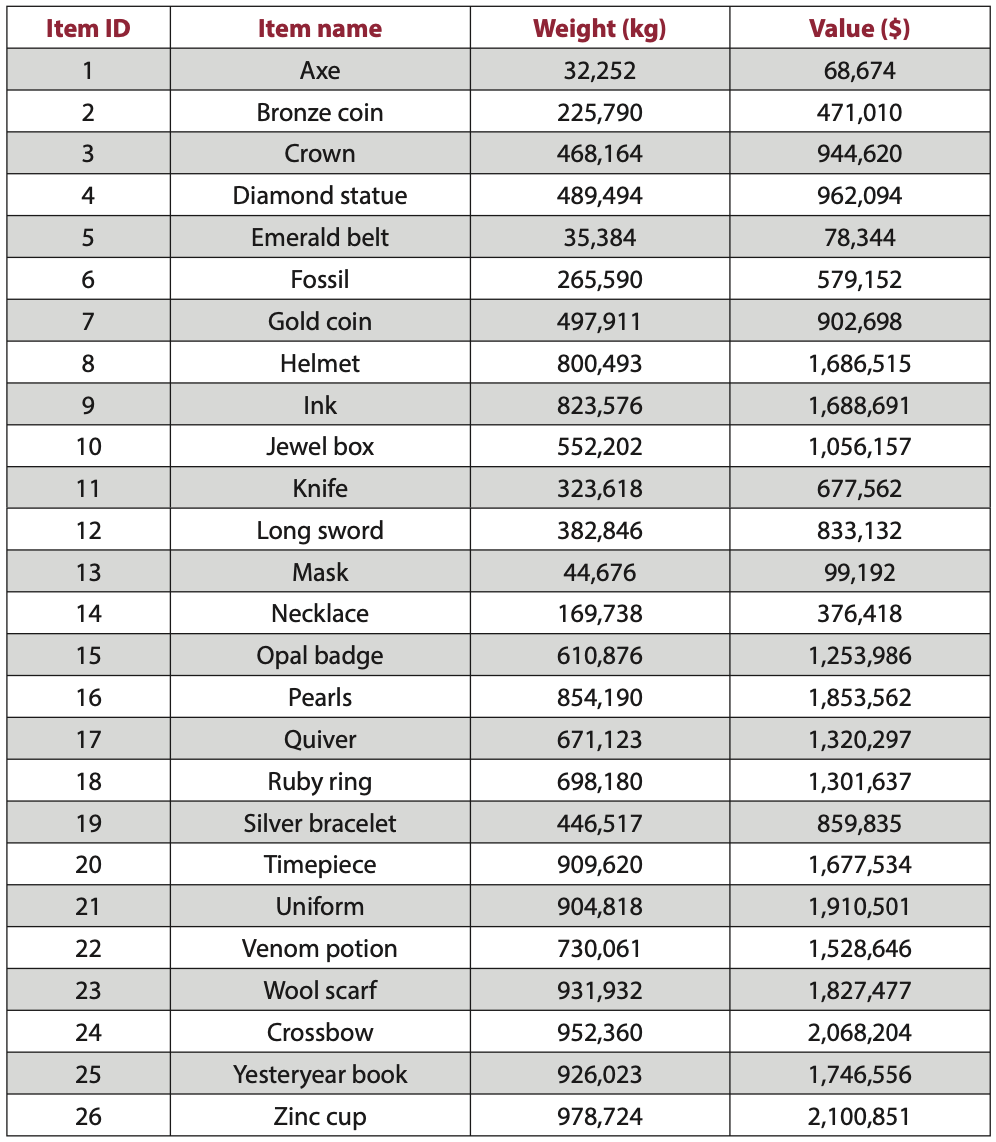

Puede utilizar la siguiente estructura:

In [79]:
knapsack_items = [
    ['Axe', 32252, 68674],
    ['Bronze coin', 225790, 471010],
    ['Crown', 468164, 944620],
    ['Diamond statue', 489494, 962094],
    ['Emerald belt', 35384, 78344],
    ['Fossil', 265590, 579152],
    ['Gold coin', 497911, 902698],
    ['Helmet', 800493, 1686515],
    ['Ink', 823576, 1688691],
    ['Jewel box', 552202, 1056157],
    ['Knife', 323618, 677562],
    ['Long sword', 382846, 833132],
    ['Mask', 44676, 99192],
    ['Necklace', 169738, 376418],
    ['Opal badge', 610876, 1253986],
    ['Pearls', 854190, 1853562],
    ['Quiver', 671123, 1320297],
    ['Ruby ring', 698180, 1301637],
    ['Silver bracelet', 446517, 859835],
    ['Timepiece', 909620, 1677534],
    ['Uniform', 904818, 1910501],
    ['Venom potion', 730061, 1528646],
    ['Wool scarf', 931932, 1827477],
    ['Cross bow', 952360, 2068204],
    ['Yesteryear book', 926023, 1746556],
    ['Zinc cup', 978724, 2100851, 0]
]

def run_brute_force():
    bit_string_size = 26
    best_score = 0
    best_individual = []
    knapsack_max_capacity = 6404180
    print('Número de combinaciones: ', 2**bit_string_size)
    iteration = 0
    for i in product([0, 1], repeat=bit_string_size):
        current = calculate_individual_fitness(i, knapsack_max_capacity)
        if current > best_score:
            best_score = current
            best_individual = i
            print('Iteración: ', iteration)
            print('Mejor puntuación: ', best_score)
            print('El mejor individuo: ', best_individual)
        iteration += 1

    print(best_individual)


# Ejecutar el método de fuerza bruta y medir su rendimiento
start_time = time.time()
run_brute_force()
end_time = time.time()
total_time = end_time - start_time
print('Tiempo total', total_time)

Número de combinaciones:  67108864
Iteración:  1
Mejor puntuación:  2100851
El mejor individuo:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
Iteración:  3
Mejor puntuación:  3847407
El mejor individuo:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1)
Iteración:  5
Mejor puntuación:  4169055
El mejor individuo:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1)
Iteración:  7
Mejor puntuación:  5915611
El mejor individuo:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1)
Iteración:  13
Mejor puntuación:  5996532
El mejor individuo:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1)
Iteración:  15
Mejor puntuación:  7743088
El mejor individuo:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1)
Iteración:  31
Mejor puntuación:  9271734
El mejor individuo:  (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [164]:
knapsack_items = [
    ['Axe', 32252, 68674],
    ['Bronze coin', 225790, 471010],
    ['Crown', 468164, 944620],
    ['Diamond statue', 489494, 962094],
    ['Emerald belt', 35384, 78344],
    ['Fossil', 265590, 579152],
    ['Gold coin', 497911, 902698],
    ['Helmet', 800493, 1686515],
    ['Ink', 823576, 1688691],
    ['Jewel box', 552202, 1056157],
    ['Knife', 323618, 677562],
    ['Long sword', 382846, 833132],
    ['Mask', 44676, 99192],
    ['Necklace', 169738, 376418],
    ['Opal badge', 610876, 1253986],
    ['Pearls', 854190, 1853562],
    ['Quiver', 671123, 1320297],
    ['Ruby ring', 698180, 1301637],
    ['Silver bracelet', 446517, 859835],
    ['Timepiece', 909620, 1677534],
    ['Uniform', 904818, 1910501],
    ['Venom potion', 730061, 1528646],
    ['Wool scarf', 931932, 1827477],
    ['Cross bow', 952360, 2068204],
    ['Yesteryear book', 926023, 1746556],
    ['Zinc cup', 978724, 2100851, 0]
]

def cruce(padres, prob=0.7):
  padre1=padres[0][1]
  padre2=padres[1][1]

  if random.random()<prob:
    pos=random.randint(1,len(padre1)-1)
    hijo1=padre1[:pos]+padre2[pos:]
    hijo2=padre2[:pos]+padre1[pos:]
  else:
    pos=random.randint(1,len(padre1)-1)
    hijo1=padre2[:pos]+padre1[pos:]
    hijo2=padre1[:pos]+padre2[pos:]
  hijo=[hijo1,hijo2]

  return hijo

peso_maximo=6404180
generaciones = 100
num_individuos = 1000
prob = 0.7
prob_mut = 0.1

#padres
individuos=cromosomas(num_individuos,len(knapsack_items))

for i in range(generaciones):
  individuos=mejores(individuos,peso_maximo)
  hijos=[]
  for _ in range(int(num_individuos/2)):
    hijo=cruce(individuos, prob)
    hijos.append(hijo[0])
    hijos.append(hijo[1])
  #print('hijos',hijos)
  individuos=mutacion(hijos, prob_mut)

  #individuos=mejores(hijos,peso_maximo)
individuos=mejores(individuos,peso_maximo)
print(individuos)
print(adaptabilidad(individuos[0][1],peso_maximo))

[(13445631, [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]), (13445631, [1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1])]
13445631
